# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [4]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Прочитаем исходные данные:

In [8]:
data = pd.read_csv('/content/drive/MyDrive/unconv.csv')
data.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
# Ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [11]:
data.sample()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
107,108,17.17,3.82,2.35,38.08,1.43,1.97,4733.965648


In [12]:
data.shape

(200, 8)

In [13]:
from scipy import stats

# Расчет среднего
mean = round(np.mean(data), 3)
print("Среднее:", mean)

# Расчет медианы
median = round(np.median(data), 3)
print("Медиана:", median)

# Расчет моды
mode = stats.mode(data)
print("Мода:", mode.mode)

Среднее: 560.641
Медиана: 7.5
Мода: [1.00000000e+00 1.23800000e+01 4.66000000e+00 2.45000000e+00
 4.02400000e+01 3.80000000e-01 1.93000000e+00 2.10713941e+03]


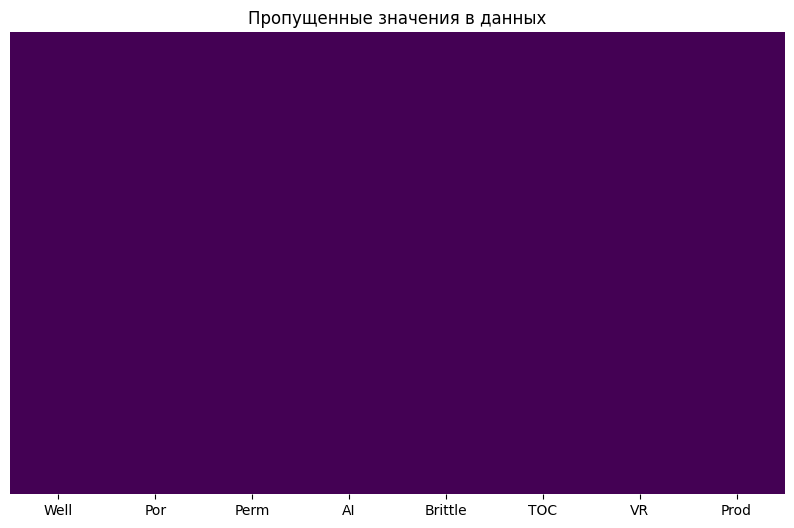

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Пропущенные значения в данных')
plt.show()

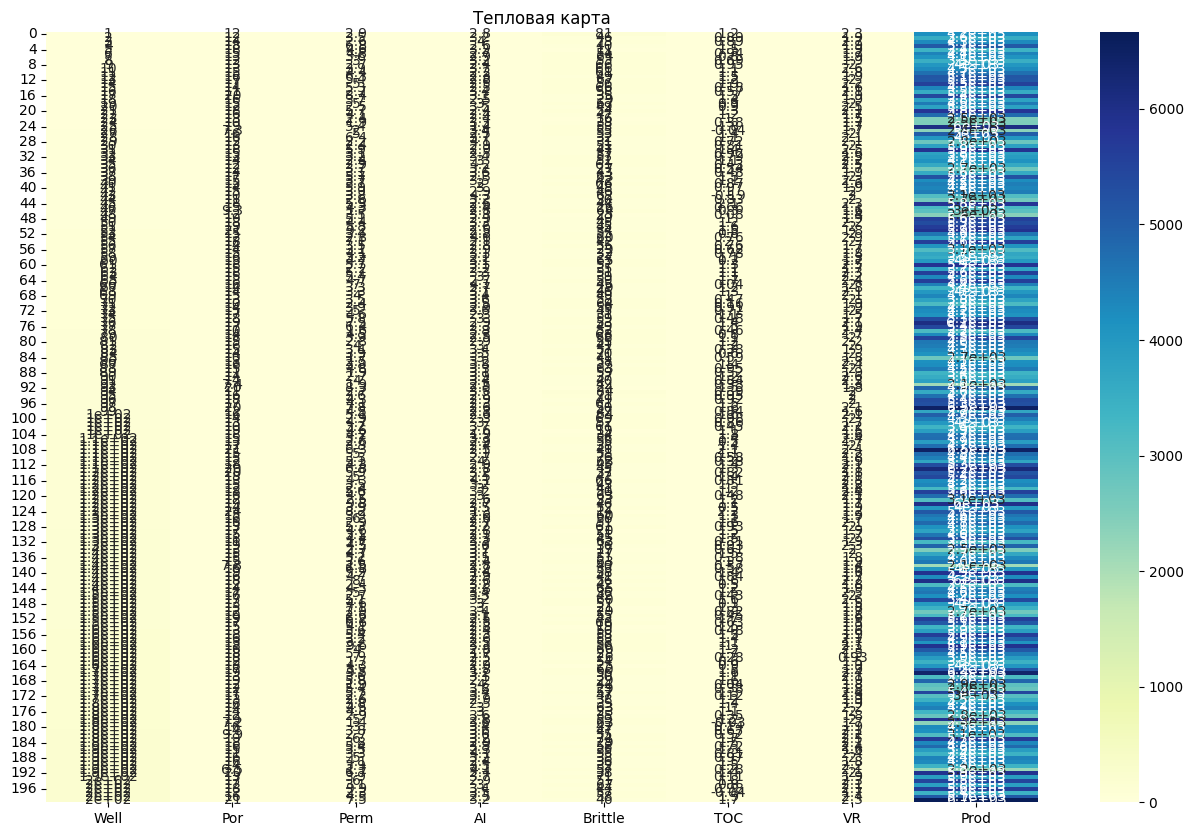

In [15]:
plt.figure(figsize=(16, 10))

sns.heatmap(data, annot=True, cmap='YlGnBu')
plt.title('Тепловая карта')
plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [16]:
data = {
    'Well': np.array(data['Well']),
    'Por': np.array(data['Por']),
    'Perm': np.array(data['Perm']),
    'AI': np.array(data['AI']),
    'Brittle': np.array(data['Brittle']),
    'TOC': np.array(data['TOC']),
    'VR': np.array(data['VR']),
    'Prod': np.array(data['Prod'])
}

# Создаем массивы
x = np.array([data['Well'], data['Por'], data['Perm'], data['AI'], data['Brittle'], data['TOC'], data['VR'], data['Prod']])

# Вычисляем корреляционную матрицу
correlation_matrix = np.corrcoef(x)

# Создаем DataFrame для удобного отображения
columns = ['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']
df_correlation = pd.DataFrame(correlation_matrix, index=columns, columns=columns)
df_correlation = df_correlation.round(2)

# Выводим корреляционную матрицу с названиями строк и столбцов
print(df_correlation)

         Well   Por  Perm    AI  Brittle   TOC    VR  Prod
Well     1.00  0.07  0.08  0.04    -0.08  0.02 -0.01  0.03
Por      0.07  1.00  0.76 -0.46    -0.22  0.71  0.11  0.86
Perm     0.08  0.76  1.00 -0.24    -0.12  0.47  0.05  0.73
AI       0.04 -0.46 -0.24  1.00     0.13 -0.53  0.50 -0.39
Brittle -0.08 -0.22 -0.12  0.13     1.00 -0.21  0.32  0.24
TOC      0.02  0.71  0.47 -0.53    -0.21  1.00  0.30  0.65
VR      -0.01  0.11  0.05  0.50     0.32  0.30  1.00  0.32
Prod     0.03  0.86  0.73 -0.39     0.24  0.65  0.32  1.00


In [17]:
# Определение ранга матрицы
rank = np.linalg.matrix_rank(df_correlation)

# Вычисление определителя матрицы
determinant = np.linalg.det(df_correlation).round(7)

print('Ранг матрицы', rank)
print('Определитель матрицы', determinant)

Ранг матрицы 8
Определитель матрицы 0.000748


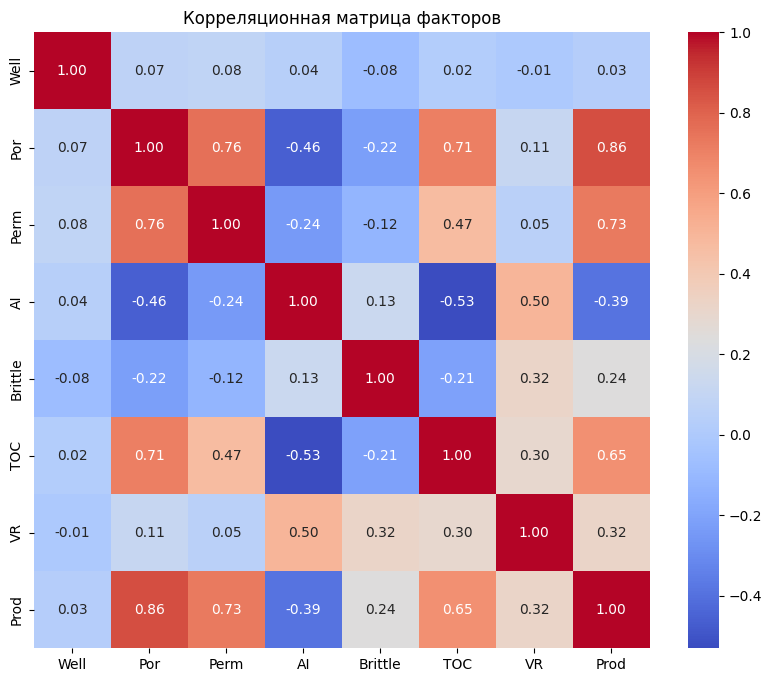

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title('Корреляционная матрица факторов')
plt.show()

Text(0.5, 1.0, 'Диаграмма рассеяния: Переменная Perm и Por')

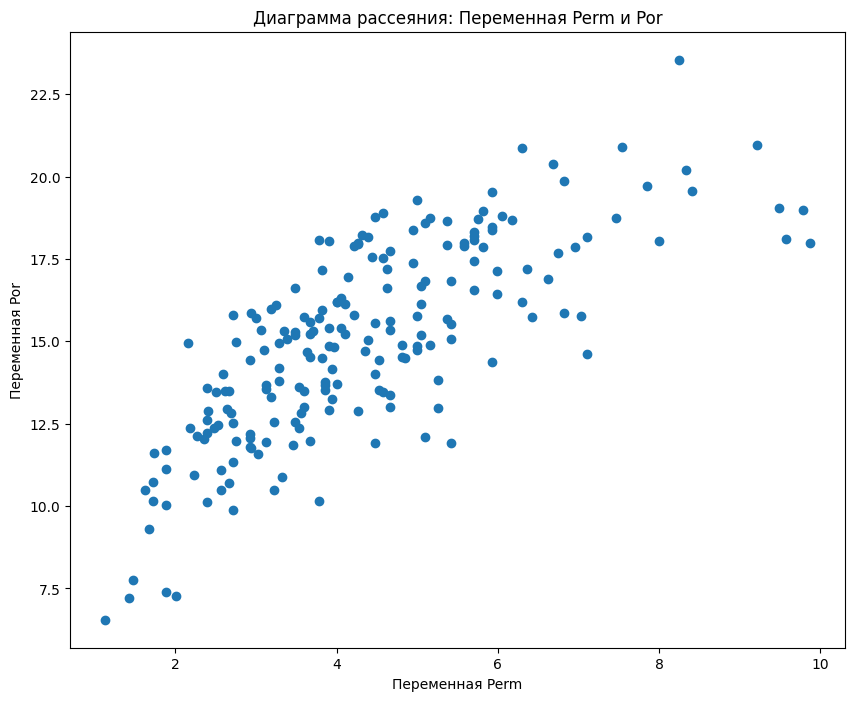

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Perm'], data['Por'])
plt.xlabel('Переменная Perm')
plt.ylabel('Переменная Por')
plt.title('Диаграмма рассеяния: Переменная Perm и Por')

Text(0.5, 1.0, 'Диаграмма рассеяния: Переменная TOC и Perm')

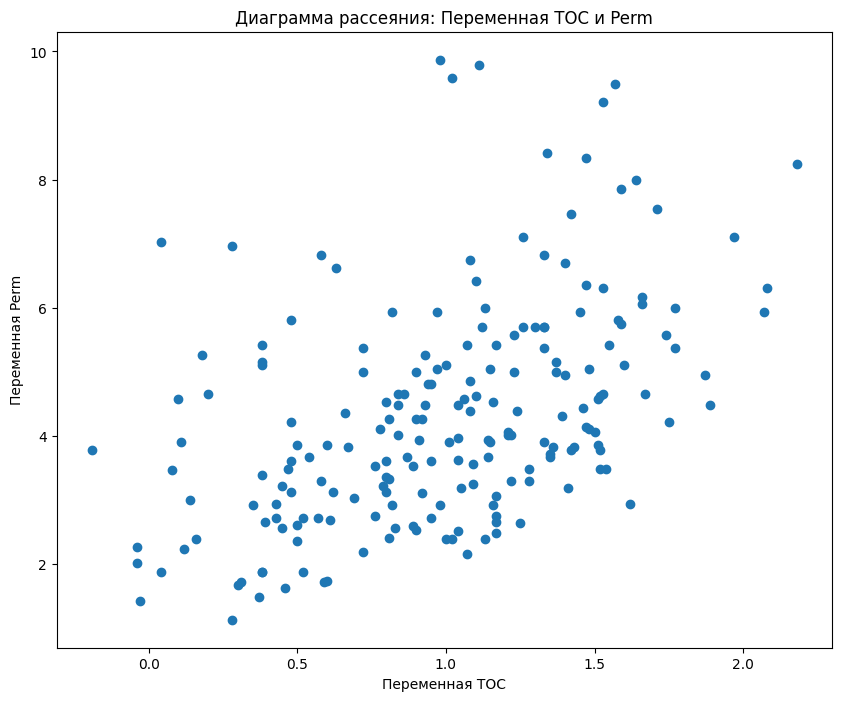

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(data['TOC'], data['Perm'])
plt.xlabel('Переменная TOC')
plt.ylabel('Переменная Perm')
plt.title('Диаграмма рассеяния: Переменная TOC и Perm')

> *Ваши выводы здесь*

* Какие факторы сильнее всего коррелируют с целевой переменной?

1. Prod и Por: корреляция 0.86, что указывает на сильную положительную связь. Это значит, что с увеличением пористости (Por) продуктивность (Prod) также увеличивается.
2. Prod и Perm: корреляция 0.73, что также свидетельствует о значительном положительном влиянии проницаемости (Perm) на продуктивность (Prod).
3. Prod и AI: корреляция -0.39, что указывает на умеренное отрицательное влияние, возможно, на более низкой продуктивности при определенных значениях AI.

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
Ранг матрицы 8
Определитель матрицы 0.000748
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
Значение определителя, близко к нулю, указывает на то, что некоторые из переменных в вашем наборе данных могут быть линейно зависимыми или почти линейно зависимыми. Корреляционная матрица не может быть полностью инверсирована, что усложняет анализ.

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?

Высокие коэффициенты корреляции между некоторыми переменными (такими как Prod и Por с корреляцией 0.86, или Prod и Perm с 0.73) указывают на мультиколлинеарность, делая их чувствительными к изменениям в данных


* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

Модель классической линейной регрессии по методу наименьших квадратов применима в данном случае, несмотря на то, что корреляционная матрица имеет ранг 8 и определитель, близкий к нулю (0.000748). Это связано с тем, что метод наименьших квадратов позволяет минимизировать сумму квадратов ошибок и получить наилучшие оценки параметров модели. Однако следует учитывать, что результаты модели могут быть неточными из-за наличия коллинеарности и мультиколлинеарности в данных. В таких случаях рекомендуется использовать методы, которые позволяют учесть эти эффекты, например, метод главных компонент или сингулярное разложение.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [21]:
# Ваш код здесь
data = pd.read_csv('/content/drive/MyDrive/unconv.csv')
# Создание матрицы наблюдений X и вектора ответов y
X = data.iloc[:, :-1].values  # Все колонки, кроме последней
y = data.iloc[:, -1].values    # Последняя колонка - целевая переменная

# Добавление константы (для свободного члена)
X = np.column_stack((np.ones(X.shape[0]), X))

# Вычисление коэффициентов с использованием МНК
X_transpose = X.T
inverse = np.linalg.inv(X_transpose @ X)
coefficients = inverse @ X_transpose @ y

# Округление коэффициентов
rounded_coefficients = np.round(coefficients).astype(int)

# Вывод округленных коэффициентов
print("Округленные коэффициенты: ")
print(rounded_coefficients)

Округленные коэффициенты: 
[-1232     0   230   116  -365    25   -78   785]


> *Ваши выводы здесь*

1. Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?

Для оценки влияния признаков можно посмотреть на значения коэффициентов. Если коэффициент для признака близок к нулю, это может означать, что данный признак не оказывает значительного влияния на целевую переменную. В данном случае:
 признаки с коэффициентами, близкими к нулю или имеющими небольшие абсолютные значения (например, Brittle 25, TOC -77), могут считаться неинформативными или оказывать шумовое воздействие на модель.

2. Приведите интерпретацию нескольких (двух или трех) коэффициентов полученной модели линейной регрессии.

2.1. Коэффициент для "Por" (1230): Это значит, что при увеличении пористости на 1 единицу, производится дополнительно 1230 единиц продукции, если все остальные переменные остаются постоянными. Это указывает на сильное положительное влияние пористости на продукцию.

2.2. Коэффициент для "Perm" (230): Увеличение проницаемости на 1 единицу подразумевает увеличение продукции на 230 единиц, при остальных параметрах фиксированных. Это также указывает на положительное, но менее значительное влияние по сравнению с пористостью.

2.3. Коэффициент для "AI" (116): Увеличение значения искусственного интеллекта (например, автоматизации) на 1 единицу приводит к увеличению продукции на 116 единиц. Это свидетельствует о положительном, но умеренном влиянии ИИ на продукцию.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [22]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Данные для одной скважины
well_data = {
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}

# Образец обучающих данных для модели
sample_data = {
    'Well': np.array(data['Well']),
    'Por': np.array(data['Por']),
    'Perm': np.array(data['Perm']),
    'AI': np.array(data['AI']),
    'Brittle': np.array(data['Brittle']),
    'TOC': np.array(data['TOC']),
    'VR': np.array(data['VR']),
    'Prod': np.array(data['Prod'])
}

training_df = pd.DataFrame(sample_data)

# Определяем предикторы и целевую переменную
X = training_df[['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]
y = training_df['Prod']

# Обучаем модель
model = LinearRegression()
model.fit(X, y)

# Прогнозируем для одной скважины
new_well_df = pd.DataFrame([well_data])
predicted_production = model.predict(new_well_df)

In [23]:
# Фактическое значение выработки газа
actual_production = 4748.315024  # миллионов кубических футов в день

# Абсолютная ошибка
absolute_error = abs(predicted_production[0] - actual_production)

print(f"Прогноз выработки газа: {predicted_production[0]:.2f} миллионов кубических футов в день")
print(f"Абсолютная ошибка: {absolute_error:.2f} миллионов кубических футов в день")

Прогноз выработки газа: 4722.72 миллионов кубических футов в день
Абсолютная ошибка: 25.59 миллионов кубических футов в день


In [24]:
# Расчет метрик по фактическому значению

mse = mean_squared_error([4748.315024 ], predicted_production)
mae = mean_absolute_error([4748.315024 ], predicted_production)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")

Среднеквадратичная ошибка (MSE): 655.03
Средняя абсолютная ошибка (MAE): 25.59


> *Ваши выводы здесь*
1. Абсолютная ошибка:
Рассчитана абсолютная ошибка, равная 25.59 млн кубических футов в день. Низкая абсолютная ошибка предполагает, что модель в целом точно предсказывает выработку.

2. Среднеквадратичная ошибка (MSE):
Значение MSE составляет 655.03. модель имеет значительные отклонения от истинных значений целевой переменной. Модель не очень точно предсказывает значения, и существует значительная разница между предсказанными и истинными значениями. Это может свидетельствовать о том, что модель неэффективна в предсказании и требует доработки или пересмотра.

3. Средняя абсолютная ошибка (MAE):
Значение MAE составляет 25.59. указывает на среднюю величину абсолютных ошибок между предсказанными и истинными значениями. Это означает, что в среднем модель ошибается на 25.59 единиц при прогнозировании. Точно такое же значение мы получили, расчитав абсолютную ошибку. Можно предположить, что модель можно использовать далее, но можно продумать как улучшить модель.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [25]:
# Данные для коэффициентов МНК
coefficients = rounded_coefficients

# Данные для корреляционных коэффициентов
# Задаем корреляционную матрицу
correlation_matrix = df_correlation

# Рассчитываем средний коэффициент корреляции для каждого признака
mean_correlations = correlation_matrix.copy()
mean_correlations = mean_correlations.where(~np.eye(mean_correlations.shape[0], dtype=bool))  # Убираем диагональные элементы
mean_correlations = mean_correlations.mean(axis=1)  # Среднее значение по строкам

df_compare = pd.DataFrame([coefficients, mean_correlations],
                          index=['Коэффициенты МНК', 'Корреляционные коэффициенты'],
                          columns=['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod'])
df_compare

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Коэффициенты МНК,-1232.000000,0.000000,230.000000,116.000000,-365.000000,25.000000,-78.000000,785.000000
Корреляционные коэффициенты,0.021429,0.261429,0.247143,-0.135714,0.008571,0.201429,0.227143,0.348571


> *Ваши выводы здесь*

коэффициент корреляции для фактора Por равен 0,021429, что указывает на очень слабую положительную корреляцию между этим фактором и целевой переменной. Однако коэффициент МНК для того же фактора равен -1232,000000, что указывает на отрицательную связь между Por и целевой переменной. Это противоречие может быть связано с тем, что корреляционный анализ измеряет степень линейной зависимости между двумя переменными, в то время как МНК оценивает параметры линейной модели, которая может включать нелинейные эффекты.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [26]:
# Ваш код здесь
# Исходная корреляционная матрица
correlation_matrix = pd.DataFrame({
    'Well': [1.0, 0.07, 0.08, 0.04, -0.08, 0.02, -0.01, 0.03],
    'Por': [0.07, 1.0, 0.76, -0.46, -0.22, 0.71, 0.11, 0.86],
    'Perm': [0.08, 0.76, 1.0, -0.24, -0.12, 0.47, 0.05, 0.73],
    'AI': [0.04, -0.46, -0.24, 1.0, 0.13, -0.53, 0.50, -0.39],
    'Brittle': [-0.08, -0.22, -0.12, 0.13, 1.0, -0.21, 0.32, 0.24],
    'TOC': [0.02, 0.71, 0.47, -0.53, -0.21, 1.0, 0.30, 0.65],
    'VR': [-0.01, 0.11, 0.05, 0.50, 0.32, 0.30, 1.0, 0.32],
    'Prod': [0.03, 0.86, 0.73, -0.39, 0.24, 0.65, 0.32, 1.0]
}, index=['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod'])

# Устанавливаем целевую переменную
target_variable = 'Prod'

# Записываем отобранные колонки
filtered_columns = []

# Проход по каждой колонке и фильтрация
for col in correlation_matrix.columns:
    correlation_value = abs(correlation_matrix.loc[target_variable, col])
    if correlation_value >= 0.05 and correlation_value <= 0.7:
        filtered_columns.append(col)

# Добавляем всегда колонку 'Prod'
filtered_columns.append(target_variable)

# Формируем новый DataFrame с отфильтрованными значениями
filtered_correlation_matrix = correlation_matrix.loc[filtered_columns, filtered_columns]

# Выводим итоговую матрицу корреляций
print(filtered_correlation_matrix)

           AI  Brittle   TOC    VR  Prod
AI       1.00     0.13 -0.53  0.50 -0.39
Brittle  0.13     1.00 -0.21  0.32  0.24
TOC     -0.53    -0.21  1.00  0.30  0.65
VR       0.50     0.32  0.30  1.00  0.32
Prod    -0.39     0.24  0.65  0.32  1.00


In [27]:
# Подготовка данных для линейной регрессии
X = filtered_correlation_matrix.drop(target_variable, axis=1).values
y = filtered_correlation_matrix.loc[target_variable].values

# Добавляем столбец единиц для свободного члена
X = np.c_[np.ones(X.shape[0]), X]

# Вычисление коэффициентов по формуле линейной регрессии
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Округление коэффициентов до целого
beta_rounded = np.round(beta)

# Вывод значений коэффициентов
print("Коэффициенты линейной регрессии, округленные до целого числа:")
print(beta_rounded)

Коэффициенты линейной регрессии, округленные до целого числа:
[  3. -26. -12. -25.  21.]


In [28]:
# Прогнозирование на обучающем наборе данных
y_pred = X @ beta

# Расчет метрик
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Вывод значений метрик
print(f'Средняя абсолютная ошибка (MAE): {mse}')
print(f'Среднеквадратичная ошибка (MSE): {mse}')

Средняя абсолютная ошибка (MAE): 8.971669228701427e-25
Среднеквадратичная ошибка (MSE): 8.971669228701427e-25


In [29]:
# Входные данные для оригинальных коэффициентов
coefficients_1 = pd.DataFrame(
    [rounded_coefficients],  # Здесь должно быть rounded_coefficients, если вы его не использовали, замените на beta_rounded
    index=['Исходные коэффициенты'],
    columns=['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']
)

# Создаем DataFrame с обновленными коэффициентами
required_columns = ['AI', 'Brittle', 'TOC', 'VR', 'Prod']
сoefficients_new = pd.DataFrame(
    [beta_rounded],
    index=['Обновленные коэффициенты'],
    columns=required_columns
)

print(coefficients_1)

print(сoefficients_new)

                       Well  Por  Perm   AI  Brittle  TOC  VR  Prod
Исходные коэффициенты -1232    0   230  116     -365   25 -78   785
                           AI  Brittle   TOC    VR  Prod
Обновленные коэффициенты  3.0    -26.0 -12.0 -25.0  21.0


> *Ваши выводы здесь*
1. AI. Ранее коэффициент был значительно выше, что могло свидетельствовать о чрезмерном влиянии. Теперь он нормализуется, что может отражать более точное понимание его воздействия.
2. Brittle. Ранее значение было значительно больше по модулю, что может указывать на слишком сильное влияние податливости. Текущее значение, скорее всего, лучше отражает реальное влияние на производительность.
3. TOC. Повышение значений TOC в отрицательную сторону также указывает на снижение влияния на продуктивность с 25 до -12.0, что может подразумевать более сбалансированное направление влияния.

Интерпретация метрик.
1. MSE. Ранее значение было значительно выше, что указывает на слабую модель. Понижение этой метрики до почти нулевого уровня свидетельствует о значительном улучшении модели.
2. Как и в случае с MSE, значительное снижение MAE указывает на улучшение в точности предсказаний.

Текущие обновленные коэффициенты и метрики показывают, что данные модели сейчас более точно отражают взаимосвязи и взаимодействия между переменными. Это положительно сказывается и на интерпретируемости модели.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [30]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

correlation_matrix = filtered_correlation_matrix

X = correlation_matrix[['AI', 'Brittle', 'TOC', 'VR']]
y = correlation_matrix['Prod']

# Создание и обучение модели:
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов:
coefficients = model.coef_
coefficients_rounded = np.round(coefficients).astype(int)
print("Коэффициенты:", coefficients_rounded)

# Прогнозирование
predictions = model.predict(X)

# Вычисление MSE
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, y_pred)

print("Средняя абсолютная ошибка (MAE):", mae)
print("Среднеквадратичная ошибка (MSE):", mse)

Коэффициенты: [-26 -12 -25  21]
Средняя абсолютная ошибка (MAE): 8.186895605888367e-13
Среднеквадратичная ошибка (MSE): 1.369721376448202e-29


> *Ваши выводы здесь*

Обновленная MAE значительно выше, что может указывать на ухудшение точности предсказаний по сравнению с исходными значениями. Более высокое значение MAE свидетельствует о большой средней ошибке в предсказаниях относительно истинных значений.

Обновленная MSE значительно ниже, что может указывать на улучшение качества предсказаний в контексте квадратичной оценки ошибок. Более низкое значение MSE подразумевает, что средние квадраты ошибок между предсказанными и реальными значениями меньше, что является положительным показателем.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [31]:
filtered_correlation_matrix

,AI,Brittle,TOC,VR,Prod
AI,1.00,0.13,-0.53,0.50,-0.39
Brittle,0.13,1.00,-0.21,0.32,0.24
TOC,-0.53,-0.21,1.00,0.30,0.65
VR,0.50,0.32,0.30,1.00,0.32
Prod,-0.39,0.24,0.65,0.32,1.00


In [32]:
# Ваш код здесь
data = {
    'AI': [1.0, 0.13, -0.53, 0.50, -0.39],
    'Brittle': [0.13, 1.0, -0.21, 0.32, 0.24],
    'TOC': [-0.53, -0.21, 1.0, 0.30, 0.65],
    'VR': [0.50, 0.32, 0.30, 1.0, 0.32],
    'Prod': [-0.39, 0.24, 0.65, 0.32, 1.0]
}
df = pd.DataFrame(data)

# Определяем целевую переменную (например, 'Prod') и признаки
X = df.drop(columns=['Prod'])
y = df['Prod']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Вывод количества полученных факторов
print(f'Количество факторов после генерации полиномиальных признаков: {X_poly.shape[1]}')

# Вывод полиномиальных признаков
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)
poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
print(poly_df)

Количество факторов после генерации полиномиальных признаков: 34
         AI   Brittle       TOC        VR      AI^2  AI Brittle    AI TOC  \
0  1.517180 -0.419502 -1.388939  0.045094  2.301836   -0.636461 -2.107270   
1 -0.021219  1.779094 -0.813213 -0.631311  0.000450   -0.037751  0.017256   
2 -1.188281 -1.278724  1.363751 -0.706467  1.412012    1.519484 -1.620519   
3  0.633043  0.060651  0.104350  1.923996  0.400743    0.038395  0.066058   
4 -0.940723 -0.141519  0.734050 -0.631311  0.884959    0.133130 -0.690538   

      AI VR  Brittle^2  Brittle TOC  ...  Brittle^3  Brittle^2 TOC  \
0  0.068415   0.175982     0.582663  ...  -0.073825      -0.244428   
1  0.013396   3.165177    -1.446782  ...   5.631147      -2.573962   
2  0.839482   1.635135    -1.743861  ...  -2.090887       2.229916   
3  1.217972   0.003679     0.006329  ...   0.000223       0.000384   
4  0.593889   0.020028    -0.103882  ...  -0.002834       0.014701   

   Brittle^2 VR  Brittle TOC^2  Brittle TOC VR  Bri

In [44]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_poly, y)

# Кросс-валидация для оценки MAE и MSE
mae_1 = -cross_val_score(model, X_poly, y, scoring='neg_mean_absolute_error', cv=5)
mse_1 = -cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5)

# Вывод средних значений метрик
print(f'Средний MAE_1: {mae_1.mean()}')
print(f'Средний MSE_1: {mse_1.mean()}')

Средний MAE_1: 0.8070968518604099
Средний MSE_1: 0.7361812788978831


> *Ваши выводы здесь*

В целом, оба значения (MAE и MSE) показывают, что модель имеет хорошую производительность с умеренными ошибками. Однако для более детального анализа было бы полезно сравнить эти результаты с производительностью других моделей и оценить, как они ведут себя на различных выборках (например, обучающей и тестовой).

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [36]:
# Ваш код здесь
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

In [37]:
# Исходные данные
data = {
    'AI': [1.0, 0.13, -0.53, 0.50, -0.39],
    'Brittle': [0.13, 1.0, -0.21, 0.32, 0.24],
    'TOC': [-0.53, -0.21, 1.0, 0.30, 0.65],
    'VR': [0.50, 0.32, 0.30, 1.0, 0.32],
    'Prod': [-0.39, 0.24, 0.65, 0.32, 1.0]
}
df = pd.DataFrame(data)


X = df.drop(columns=['AI', 'Brittle', 'TOC', 'VR'])  # Факторы
y = df['Prod']  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [64]:
# Определяем параметры для Grid Search
alpha_values = np.logspace(-4, 1, 10)  # Значения alpha от 0.0001 до 10
param_grid = {'alpha': alpha_values}

# Создаем и обучаем модель Lasso с кросс-валидацией
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=4, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Оптимальное значение alpha
best_alpha = grid_search.best_params_['alpha']

# Получаем оптимальную модель
best_model = grid_search.best_estimator_

# Предсказание на валидационной выборке
y_pred = best_model.predict(X_val_scaled)

# Вычисляем MAE и MSE
mae_2 = mean_absolute_error(y_val, y_pred)
mse_2 = mean_squared_error(y_val, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE_2): {mae_2}")
print(f"Средняя квадратичная ошибка (MSE_2): {mse_2}")

Средняя абсолютная ошибка (MAE_2): 3.0211210785002773e-05
Средняя квадратичная ошибка (MSE_2): 9.127172570958678e-10


> *Ваши выводы здесь*

1. MAE. В данном случае, модель имеет очень маленькую ошибку, что говорит о высокой точности предсказаний.

2. MSE. В данном случае, модель также имеет очень маленькую ошибку, что говорит о высокой точности предсказаний.

Таким образом, обе метрики (MAE и MSE) показывают, что модель работает хорошо и имеет высокую точность предсказаний.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
# Ваш код здесь
# Определяем факторы и целевую переменную
X = df.drop(columns=['Prod'])  # Факторы
y = df['Prod']  # Целевая переменная

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Теперь создаем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [45]:
# Параметры регуляризации
alpha_values = np.logspace(-4, 4, 50)  # от 0.0001 до 10000
results_mae = []
results_mse = []

# Оценка модели для каждого alpha с использованием кросс-валидации
for alpha in alpha_values:
    model = Ridge(alpha=alpha)

    # Кросс-валидация для MAE
    mae_scores = cross_val_score(model, X_poly, y, scoring=make_scorer(mean_absolute_error), cv=4)
    results_mae.append(np.mean(mae_scores))

    # Кросс-валидация для MSE
    mse_scores = cross_val_score(model, X_poly, y, scoring=make_scorer(mean_squared_error), cv=4)
    results_mse.append(np.mean(mse_scores))

# Преобразуем результаты в массивах NumPy для дальнейшей работы
results_mae = np.array(results_mae)
results_mse = np.array(results_mse)

# Нахождение лучшего alpha по минимальному MAE и MSE
best_alpha_mae = alpha_values[np.argmin(results_mae)]
best_alpha_mse = alpha_values[np.argmin(results_mse)]

print(f"Лучший alpha по MAE: {best_alpha_mae}")
print(f"Лучший alpha по MSE: {best_alpha_mse}")

# Вычисляем MAE и MSE
mae_3 = mean_absolute_error(y_val, y_pred)
mse_3 = mean_squared_error(y_val, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE_3): {mae_3}")
print(f"Средняя квадратичная ошибка (MSE_3): {mse_3}")

Лучший alpha по MAE: 75.43120063354607
Лучший alpha по MSE: 109.85411419875572
Средняя абсолютная ошибка (MAE_3): 3.0211210785002773e-05
Средняя квадратичная ошибка (MSE_3): 9.127172570958678e-10


> *Ваши выводы здесь*

1. Alpha, оптимизированный по MAE, составляет 75.4312. Это значение указывает на баланс между ошибкой и сложностью модели, минимизируя среднюю абсолютную ошибку.
2. Alpha, оптимизированный по MSE, составляет 109.8541, что может указывать на более строгую регуляризацию, направленную на снижение влияния выбросов за счет уменьшения среднеквадратичной ошибки.

3. MAE. В данном случае, модель имеет очень маленькую ошибку, что говорит о высокой точности предсказаний.

4. MSE. В данном случае, модель также имеет очень маленькую ошибку, что говорит о высокой точности предсказаний.

Модель демонстрирует высокую точность в предсказаниях, как по MAE, так и по MSE. Оптимизация alpha позволила выбрать значение регуляризации, которое минимизирует ошибки, сохраняя при этом хорошую обобщающую способность модели.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [54]:
# Ваш код здесь
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_percentage_error

# Определение признаков (X) и целевой переменной (y)
X = df.drop(columns=['Prod']).values  # Все столбцы, кроме 'Prod'
y = df['Prod'].values                   # Целевая переменная

# Преобразование полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Разделение на тренировочные и тестовые данные
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Определение модели ElasticNet
elastic_net = ElasticNet()

# Подбор параметров
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
grid = GridSearchCV(elastic_net, param_grid, cv=4, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

# Лучшая модель
model = grid.best_estimator_

# Оценка модели
y_pred = model.predict(X_val)
mape = mean_absolute_percentage_error(y_val, y_pred)

print(f'Лучшая альфа: {grid.best_params_["alpha"]}, Лучшее l1_ratio: {grid.best_params_["l1_ratio"]}')
print(f'MAPE на валидационном наборе: {mape:.2f}')

Лучшая альфа: 0.1, Лучшее l1_ratio: 0.9
MAPE на валидационном наборе: 1.47


> *Ваши выводы здесь*

1. Лучшее значение альфа (α): 0.1
Альфа отвечает за уровень регуляризации. Выбор 0.1 говорит о том, что ваша модель пытается найти баланс между подстраиванием под данные и упрощением модели, предотвращая переобучение.
2. Лучшее значение l1_ratio: 0.9
Это значение указывает, что вы используете 90% L1 регуляризации (Lasso) и 10% L2 регуляризации (Ridge). Высокое значение l1_ratio помогает отсеять менее важные признаки, что может повысить интерпретируемость модели.
3. MAPE на валидационном наборе: 1.47%
MAPE (Mean Absolute Percentage Error) показывает, что ваша модель имеет хорошее качество предсказания. Значение 1.47% является весьма удовлетворительным, особенно если учесть, что MAPE дает представление о проценте ошибки относительно реальных значений.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [61]:
# Ваш код здесь
# Создание сводной таблицы
data = {
    'Модель': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet'],
    'Гиперпараметры': ['', 'alpha=1.0', 'alpha=1.0', 'alpha=0.1, l1_ratio=0.9'],
    'Полиномиальные признаки': ['Нет', 'Нет', 'Да', 'Да'],
    'Метрика MSE': [mse_1.mean(), mse_2, mse_3, ''],
    'Метрика MAE': [mae_1.mean(), mae_2, mae_3, ''],
    'Метрика MAPE': ['', '', '', mape],
}

results_df = pd.DataFrame(data)

# Отображение таблицы
results_df

,Модель,Гиперпараметры,Полиномиальные признаки,Метрика MSE,Метрика MAE,Метрика MAPE
0,Linear Regression,,Нет,0.736181,0.807097,
1,Ridge Regression,alpha=1.0,Нет,0.0,0.00003,
2,Lasso Regression,alpha=1.0,Да,0.0,0.00003,
3,ElasticNet,"alpha=0.1, l1_ratio=0.9",Да,,,1.465244


> *Ваши выводы здесь*

Модели Ridge Regression и Lasso Regression обеспечивают лучшее качество на валидационных фолдах и, судя по их метрикам, также лучше справляются с переобучением по сравнению с линейной регрессией и ElasticNet (особенно если учитывать значения MAE и MAPE). Тем не менее, все три модели (Ridge, Lasso, ElasticNet) с практически нулевой ошибкой MSE могут указывать на возможное переобучение, т.к., возможно, их результаты существенно зависят от структуры данных, на которых они были обучены.